# preface

importing libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from PIL import Image

data load

In [ ]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
ydic={ 0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
               5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

4431872/4422102 [==============================] - 0s 0us/step


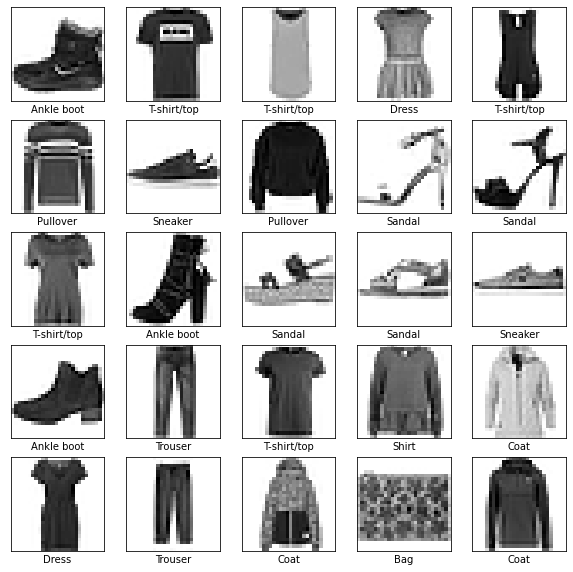




our train input shape is (60000, 28, 28) and train output is (60000,)
our test input shape is (10000, 28, 28) and test output is (10000,)


In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(ydic[trainY[i]])
plt.show()

print(2*"\n")
print(f'our train input shape is {np.shape(trainX)} and train output is {np.shape(trainY)}')
print(f'our test input shape is {np.shape(testX)} and test output is {np.shape(testY)}')

data preprocess

In [ ]:
# normalize data
trainx=np.reshape(trainX,(-1,28*28))/255
testx=np.reshape(testX,(-1,28*28))/255
print(f'our new train shape for feeding mlp is : {trainx.shape}')
print(f'our new test shape for feeding mlp is : {testx.shape}')

our new train shape for feeding mlp is : (60000, 784)
our new test shape for feeding mlp is : (10000, 784)


one hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical
print(trainY[0:3])
trainy=to_categorical(trainY,num_classes=10)
testy=to_categorical(testY,num_classes=10)
trainy[0:3]

[9 0 0]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# **Experiment I**

The goal of this experiment is to see effect of the depth (number of hidden layers) and width (number of neurons in hidden layers). Design an MLP with a single hidden layer with “𝑛𝑖” neurons in the hidden layer (“𝑛𝑖” is arbitrarily) then:

## **a**

Train your network on the train set. Do this step with:   
 𝑛=𝑛𝑖,2𝑛𝑖,3𝑛𝑖,4𝑛𝑖 , 5𝑛𝑖

In [ ]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Dense

In [ ]:
model_matrix=[]
hidden=[]
out=[]
input_layer=Input(shape=(28*28,))
ni=120
for i in range(5):
  hidden.append(Dense(units=(1+i)*ni,activation='relu')(input_layer))
  out.append(Dense(units=10,activation='softmax')(hidden[i]))
  model_matrix.append(Model(inputs=input_layer,outputs=out[i]))

for i in range(5):
  model_matrix[i].summary()
  print(2*'\n')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 10)                1210      
                                                                 
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 2

In [ ]:
compile_matrix=[]
results_matrix=[]
for i in range(5):
  print(f'one hidden layer with {ni*(1+i)} neurons')
  print('-'*30)
  compile_matrix.append(model_matrix[i].compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy'))
  results_matrix.append(model_matrix[i].fit(trainx,trainy,batch_size=25,epochs=10))
  print('\n'*3)


one hidden layer with 120 neurons
------------------------------
Epoch 1/10
2400/2400 [==============================] - 5s 2ms/step - loss: 0.4983 - accuracy: 0.8244
Epoch 2/10
2400/2400 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8648
Epoch 3/10
2400/2400 [==============================] - 4s 2ms/step - loss: 0.3388 - accuracy: 0.8765
Epoch 4/10
2400/2400 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.8839
Epoch 5/10
2400/2400 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8900
Epoch 6/10
2400/2400 [==============================] - 4s 2ms/step - loss: 0.2810 - accuracy: 0.8957
Epoch 7/10
2400/2400 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9006
Epoch 8/10
2400/2400 [==============================] - 4s 2ms/step - loss: 0.2577 - accuracy: 0.9032
Epoch 9/10
2400/2400 [==============================] - 4s 2ms/step - loss: 0.2462 - accuracy: 0.9070
Epoch 10/10
2400/

In [ ]:
results_matrix[0].history  ## checking our results matrix

{'accuracy': [0.8244166374206543,
  0.8648166656494141,
  0.8764500021934509,
  0.8838666677474976,
  0.8899833559989929,
  0.8957333564758301,
  0.9006333351135254,
  0.903249979019165,
  0.9069833159446716,
  0.9123833179473877],
 'loss': [0.4983014464378357,
  0.3754735589027405,
  0.3387756943702698,
  0.31523698568344116,
  0.29620957374572754,
  0.2810148298740387,
  0.26650065183639526,
  0.257656067609787,
  0.24622395634651184,
  0.23835235834121704]}

plots

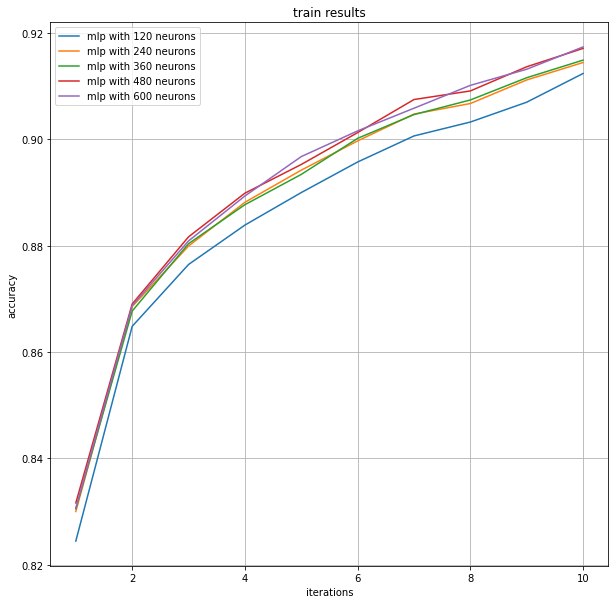

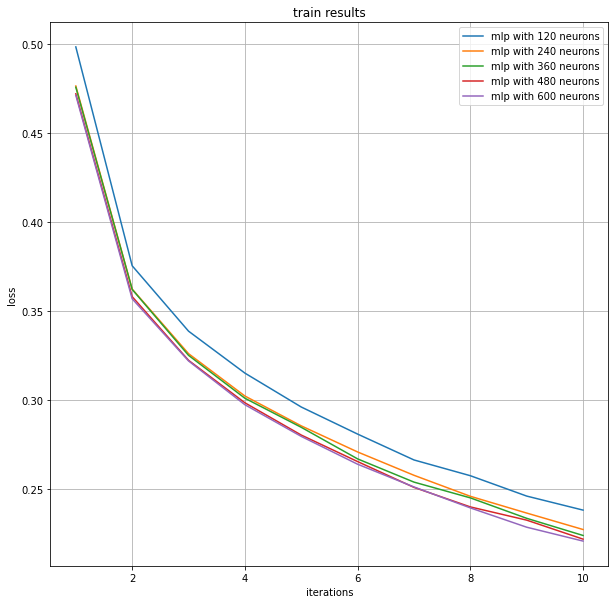

In [ ]:
plt.figure(figsize=(10,10))
for i in range(5):
  plt.plot(list(j+1 for j in range(10)),results_matrix[i].history['accuracy'],label=f'mlp with {ni*(i+1)} neurons')
  plt.ylabel('accuracy')
  plt.xlabel('iterations')
  plt.grid()
  plt.legend()
  plt.title('train results')


plt.show()
plt.figure(figsize=(10,10))
print('\n'*3)
for i in range(5):
  plt.plot(list(j+1 for j in range(10)),results_matrix[i].history['loss'],label=f'mlp with {ni*(i+1)} neurons')
  plt.ylabel('loss')
  plt.xlabel('iterations')
  plt.grid()
  plt.legend()
  plt.title('train results')


test to see how our models work and look

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2, 2, 2, 2, 2]


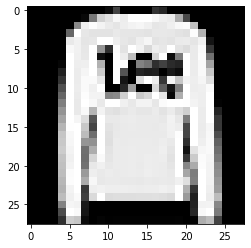

In [ ]:
y_hat=[]
test_labels=[]
for i in range(5):
  y_hat.append(np.argmax(model_matrix[i].predict(testx), axis=1))
test_labels.append(np.argmax(testy,axis=1))
print(testy[1])
#plt.imshow(np.reshape(x_test[1],(28*28)),cmap='gray')
a=np.reshape(testx[1],(28,28))*255
plt.imshow(a,cmap='gray')
np.shape(y_hat)
b=[row[1] for row in y_hat] ## to show all of our models are predicted this picture a pullover with label 2
print(b)

evaluation with test data

In [ ]:
test_results=[]
for i in range(5):
  test_results.append(model_matrix[i].evaluate(testx,testy))


313/313 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8807


In [ ]:
for i in range(5):
  print(f'our test loss for {ni*(i+1)} neurons is {test_results[i][0]} and our accuracy is {test_results[i][1]}')

our test loss for 120 neurons is 0.34281855821609497 and our accuracy is 0.8822000026702881
our test loss for 240 neurons is 0.35391363501548767 and our accuracy is 0.8812000155448914
our test loss for 360 neurons is 0.33875328302383423 and our accuracy is 0.8863999843597412
our test loss for 480 neurons is 0.3397733271121979 and our accuracy is 0.8828999996185303
our test loss for 600 neurons is 0.35020098090171814 and our accuracy is 0.8806999921798706


classification reports

In [ ]:
from sklearn.metrics import classification_report
for i in range(5):
  print(f'model with {ni*(i+1)} neurons')
  print(classification_report(np.array(test_labels).flatten(), np.array(y_hat[i]).flatten()))
  print('\n'*3)

model with 120 neurons
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.77      0.83      0.80      1000
           3       0.86      0.91      0.89      1000
           4       0.80      0.82      0.81      1000
           5       0.95      0.96      0.95      1000
           6       0.78      0.59      0.67      1000
           7       0.96      0.92      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000





model with 240 neurons
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79     

confuion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
for i in range(5):
  print(f'model with {ni*(i+1)} neurons')
  print(confusion_matrix(np.array(test_labels).flatten(), np.array(y_hat[i]).flatten()))
  print('\n'*3)


model with 120 neurons
[[880   3  22  28   4   0  57   0   6   0]
 [  1 977   0  15   2   0   5   0   0   0]
 [ 18   1 834  13  89   0  45   0   0   0]
 [ 24  12  14 913  22   0  12   0   3   0]
 [  1   0 101  39 816   0  42   0   1   0]
 [  0   0   0   2   0 960   0   9   1  28]
 [167   1 101  44  90   0 589   0   8   0]
 [  0   0   0   0   0  42   0 921   1  36]
 [  7   1  12   5   2   2   5   2 964   0]
 [  0   0   0   1   0   7   1  23   0 968]]




model with 240 neurons
[[892   0  14  13   4   1  72   0   4   0]
 [  8 970   1  15   2   0   4   0   0   0]
 [ 19   1 791  13  79   0  96   0   1   0]
 [ 50   8   7 885  19   0  26   0   5   0]
 [  1   0 103  44 738   0 111   0   3   0]
 [  0   0   0   1   0 960   0  20   1  18]
 [162   0  78  26  36   0 693   0   5   0]
 [  0   0   0   0   0  10   0 963   1  26]
 [ 13   0   6   4   3   1  16   4 953   0]
 [  0   0   0   0   0   4   1  28   0 967]]




model with 360 neurons
[[825   2  27  33   3   0 106   0   4   0]
 [  1 981   0  15 

## **b**

Train your network on the train set and start with only one hidden layer with “𝑛𝑖” neurons. Then, increase the number of hidden layers. Do this step with:
Number of hidden layers = 1, 2, 3, 4, 5

In [ ]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Dense

**Creating model**

In [ ]:
model_matrix_b=[]
hidden_b=[]
out_b=[]
ni = 120
input_layer=Input(shape=(28*28,))

for i in range(5):
  append_matrix=[]
  for j in range(i+1):
    if j==0:
      append_matrix.append(Dense(units=ni,activation='relu')(input_layer))
    else:
      append_matrix.append(Dense(units=ni,activation='relu')(append_matrix[j-1]))
  hidden_b.append(append_matrix)
  out_b.append(Dense(units=10,activation='softmax')(hidden_b[i][i]))
  model_matrix_b.append(Model(inputs=input_layer,outputs=out_b[i]))

for i in range(5):
  model_matrix_b[i].summary()
  print(2*'\n')

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_100 (Dense)           (None, 120)               94200     
                                                                 
 dense_101 (Dense)           (None, 10)                1210      
                                                                 
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________



Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_102 (Dense)           (Non

Plotting model

1 hidden layer


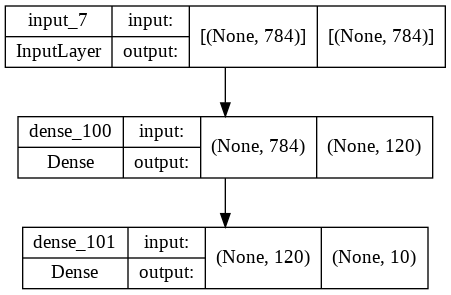






2 hidden layer


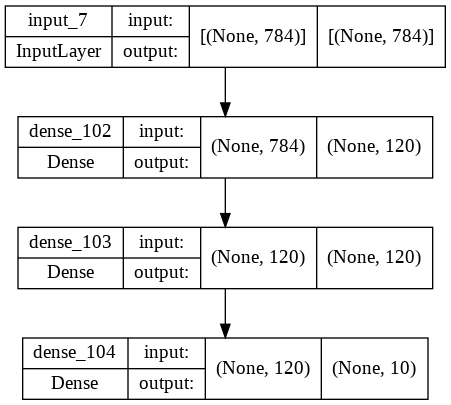






3 hidden layer


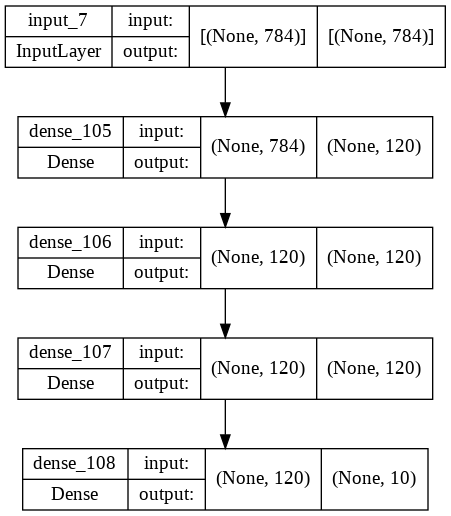






4 hidden layer


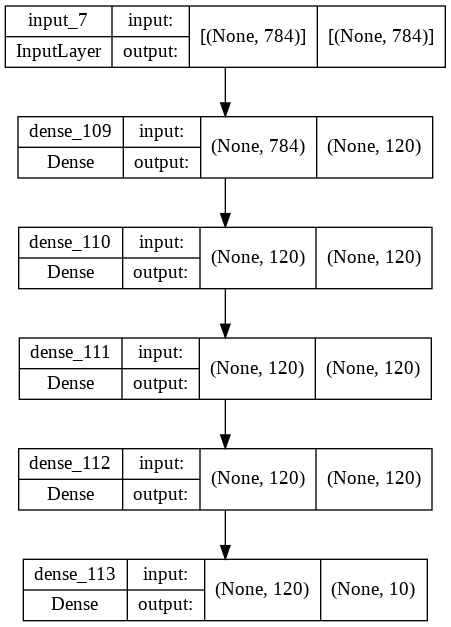






5 hidden layer


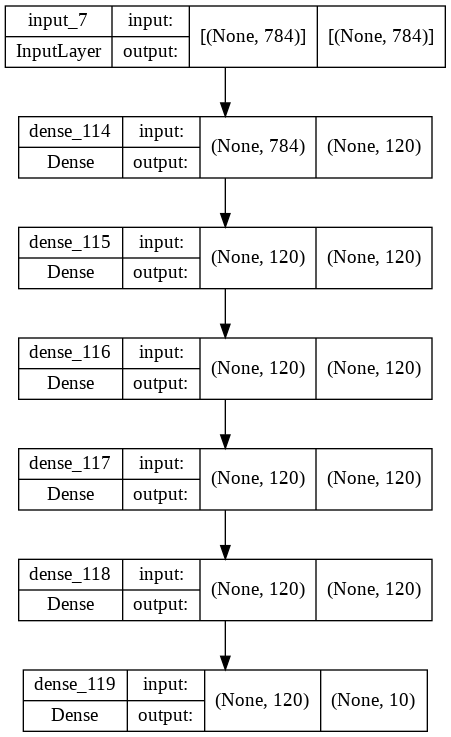

In [ ]:
from tensorflow.keras.utils import plot_model
for i in range(5):
  print(f'{i+1} hidden layer')
  display(plot_model(model_matrix_b[i], show_shapes=True))
  print('\n'*4)

In [ ]:
compile_matrix_b=[]
results_matrix_b=[]
for i in range(5):
  print(f'mlp with {i+1} hidden layer and 120 neurons')
  print('-'*30)
  compile_matrix_b.append(model_matrix_b[i].compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy'))
  results_matrix_b.append(model_matrix_b[i].fit(trainx,trainy,batch_size=25,epochs=10))
  print('\n'*3)


mlp with 1 hidden layer and 120 neurons
------------------------------
Epoch 1/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.3646 - accuracy: 0.8673
Epoch 2/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.3286 - accuracy: 0.8791
Epoch 3/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.3095 - accuracy: 0.8862
Epoch 4/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.2940 - accuracy: 0.8906
Epoch 5/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.2783 - accuracy: 0.8975
Epoch 6/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.2668 - accuracy: 0.9021
Epoch 7/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.2555 - accuracy: 0.9046
Epoch 8/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.2477 - accuracy: 0.9071
Epoch 9/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.2399 - accuracy: 0.9110
Epoch 10/10

plotting results

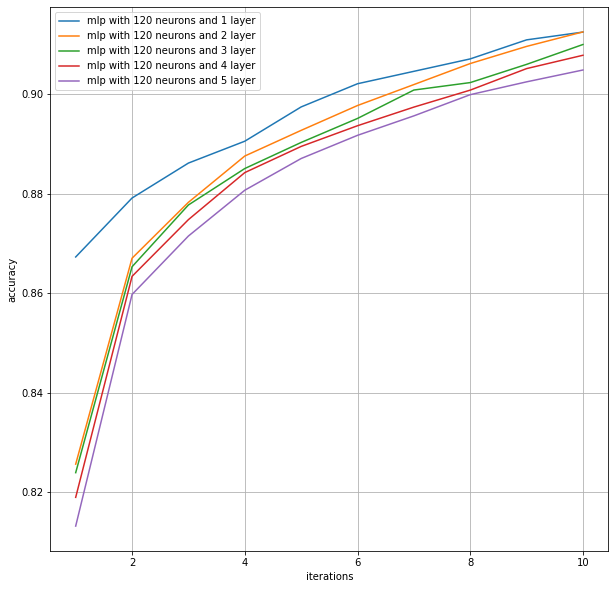

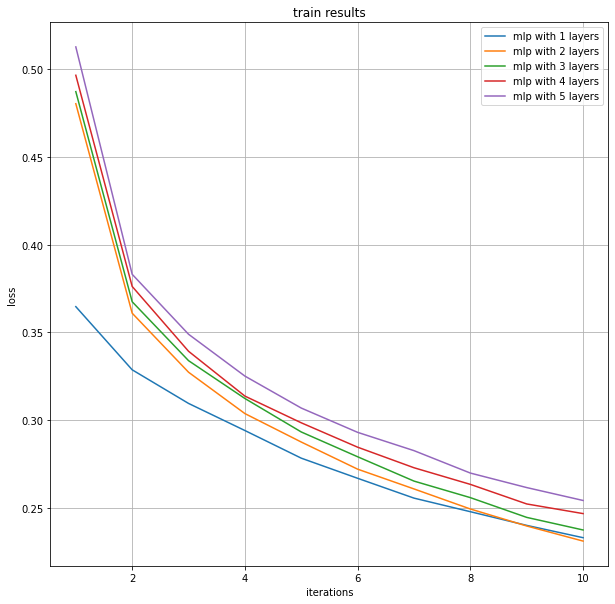

In [ ]:
plt.figure(figsize=(10,10))
for i in range(5):
  plt.plot(list(i+1 for i in range(10)),results_matrix_b[i].history['accuracy'],label=f'mlp with 120 neurons and {i+1} layer')
  plt.ylabel('accuracy')
  plt.xlabel('iterations')
  plt.grid()
  plt.legend()


plt.show()

plt.figure(figsize=(10,10))
print('\n'*3)
for i in range(5):
  plt.plot(list(j+1 for j in range(10)),results_matrix_b[i].history['loss'],label=f'mlp with {(i+1)} layers')
  plt.ylabel('loss')
  plt.xlabel('iterations')
  plt.grid()
  plt.legend()
  plt.title('train results')
plt.show()

evaluation on test

In [ ]:
test_results_b=[]
for i in range(5):
  test_results_b.append(model_matrix_b[i].evaluate(testx,testy))


313/313 [==============================] - 1s 2ms/step - loss: 0.3484 - accuracy: 0.8772


In [ ]:
for i in range(5):
  print(f'our test loss for {(i+1)} layer is {test_results_b[i][0]} and our accuracy is {test_results_b[i][1]}')

our test loss for 1 layer is 0.3373805582523346 and our accuracy is 0.8826000094413757
our test loss for 2 layer is 0.3442603647708893 and our accuracy is 0.8851000070571899
our test loss for 3 layer is 0.32482269406318665 and our accuracy is 0.8877000212669373
our test loss for 4 layer is 0.3407050669193268 and our accuracy is 0.8847000002861023
our test loss for 5 layer is 0.34838977456092834 and our accuracy is 0.8772000074386597


checking models wprediction for 1 test data

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2, 2, 2, 2, 2]


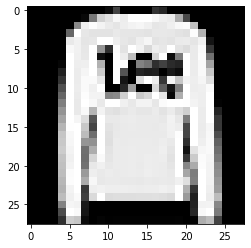

In [ ]:
y_hat_b=[]
test_labels_b=[]
for i in range(5):
  y_hat_b.append(np.argmax(model_matrix_b[i].predict(testx), axis=1))
test_labels_b.append(np.argmax(testy,axis=1))
print(testy[1])
#plt.imshow(np.reshape(x_test[1],(28*28)),cmap='gray')
a_b=np.reshape(testx[1],(28,28))*255
plt.imshow(a_b,cmap='gray')
b_b=[row[1] for row in y_hat_b]
print(b_b)

confusion matrix and classfication reports of test set

In [ ]:
from sklearn.metrics import classification_report
for i in range(5):
  print(f'classification reports for {i+1} layer')
  print(classification_report(np.array(test_labels_b).flatten(),np.array(y_hat_b[i]).flatten()))
  print('\n'*3)

classification reports for 1 layer
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.75      0.85      0.80      1000
           3       0.90      0.88      0.89      1000
           4       0.79      0.81      0.80      1000
           5       0.97      0.97      0.97      1000
           6       0.75      0.63      0.68      1000
           7       0.92      0.97      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000





classification reports for 2 layer
              precision    recall  f1-score   support

           0       0.75      0.92      0.82      1000
           1       0.99      0.97      0.98      1000
    

In [ ]:
from sklearn.metrics import confusion_matrix
for i in range(5):
  print(f'confusion matrix for {i+1} layer')
  print('\n')
  print(confusion_matrix(np.array(test_labels_b).flatten(),np.array(y_hat_b[i]).flatten()))
  print(3*'\n'+'-'*100)

confusion matrix for 1 layer


[[853   1  20  23   6   2  89   0   6   0]
 [  2 973   1  18   4   0   2   0   0   0]
 [ 20   3 850   7  77   0  40   1   2   0]
 [ 20   8  15 881  43   0  25   0   8   0]
 [  2   1 127  23 806   0  41   0   0   0]
 [  0   0   0   1   0 966   0  22   1  10]
 [143   3 112  20  86   0 627   0   9   0]
 [  0   0   0   0   0  21   0 967   0  12]
 [  8   1   3   4   3   4   6   4 967   0]
 [  0   0   0   0   0   8   1  55   0 936]]



----------------------------------------------------------------------------------------------------
confusion matrix for 2 layer


[[917   0  11  10   4   1  54   0   3   0]
 [  6 966   2  18   3   1   4   0   0   0]
 [ 25   2 770   9 123   0  71   0   0   0]
 [ 62   6   9 863  36   0  23   0   1   0]
 [  5   1  60  25 844   0  65   0   0   0]
 [  0   0   0   0   0 953   0  28   1  18]
 [199   0  75  21  57   0 644   0   4   0]
 [  0   0   0   0   0   5   0 970   0  25]
 [ 14   0   4   1   3   1   4   4 969   0]
 [  0   0   0   

# Experiment II

The goal of this experiment is to see the effect of different optimizers. Choose the best architecture from the previous experiment and train the model with the following optimizers:       Adam, RMSProb, Adagrad, SGD+Momentum, SGD (with no momentum).

Compare the result from this experiment and write your own conclusion.

with studying previous sections in train  for number of nerouns we recognize that best number is 5*ni or 600 for this case and the best number for our
layer is 2 layer and for test data the best number of nerouns is 4 *ni or
480 and for our number of layer for test the best value is 3 as same as our train results


**create our models**

## adam

In [ ]:
hidden_matrix=[]
input_layer2=Input(shape=(28*28,))
ni=120
for i in range(3):
  if i==0:
    hidden_matrix.append(Dense(units=3*ni,activation='relu')(input_layer2))
  else:
    hidden_matrix.append(Dense(units=3*ni,activation='relu')(hidden_matrix[i-1]))
display(i)
out_II=Dense(units=10,activation='softmax')(hidden_matrix[i])

model_IIa=Model(inputs=input_layer2,outputs=out_II)
model_IIa.summary()

2

Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_154 (Dense)           (None, 360)               282600    
                                                                 
 dense_155 (Dense)           (None, 360)               129960    
                                                                 
 dense_156 (Dense)           (None, 360)               129960    
                                                                 
 dense_157 (Dense)           (None, 10)                3610      
                                                                 
Total params: 546,130
Trainable params: 546,130
Non-trainable params: 0
_________________________________________________________________


adam

In [ ]:
model_IIa.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model_adam=model_IIa.fit(trainx,trainy,batch_size=25,epochs=10)

Epoch 1/10
2400/2400 [==============================] - 17s 7ms/step - loss: 0.4776 - accuracy: 0.8259
Epoch 2/10
2400/2400 [==============================] - 16s 7ms/step - loss: 0.3658 - accuracy: 0.8654
Epoch 3/10
2400/2400 [==============================] - 21s 9ms/step - loss: 0.3304 - accuracy: 0.8788
Epoch 4/10
2400/2400 [==============================] - 17s 7ms/step - loss: 0.3064 - accuracy: 0.8862
Epoch 5/10
2400/2400 [==============================] - 27s 11ms/step - loss: 0.2904 - accuracy: 0.8924
Epoch 6/10
2400/2400 [==============================] - 22s 9ms/step - loss: 0.2761 - accuracy: 0.8968
Epoch 7/10
2400/2400 [==============================] - 26s 11ms/step - loss: 0.2659 - accuracy: 0.8990
Epoch 8/10
2400/2400 [==============================] - 24s 10ms/step - loss: 0.2568 - accuracy: 0.9029
Epoch 9/10
2400/2400 [==============================] - 21s 9ms/step - loss: 0.2451 - accuracy: 0.9077
Epoch 10/10
2400/2400 [==============================] - 19s 8ms/step 

## RMSProbe

In [ ]:
hidden_matrix=[]
input_layer2=Input(shape=(28*28,))
ni=120
for i in range(3):
  if i==0:
    hidden_matrix.append(Dense(units=3*ni,activation='relu')(input_layer2))
  else:
    hidden_matrix.append(Dense(units=3*ni,activation='relu')(hidden_matrix[i-1]))
display(i)
out_II=Dense(units=10,activation='softmax')(hidden_matrix[i])

model_II_RMS=Model(inputs=input_layer2,outputs=out_II)
model_II_RMS.summary()
model_II_RMS.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics='accuracy')
model_RMSProbe=model_II_RMS.fit(trainx,trainy,batch_size=25,epochs=10)

2

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_158 (Dense)           (None, 360)               282600    
                                                                 
 dense_159 (Dense)           (None, 360)               129960    
                                                                 
 dense_160 (Dense)           (None, 360)               129960    
                                                                 
 dense_161 (Dense)           (None, 10)                3610      
                                                                 
Total params: 546,130
Trainable params: 546,130
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2400/2400 [==============================

## adagrad

In [ ]:
hidden_matrix=[]
input_layer2=Input(shape=(28*28,))
ni=120
for i in range(3):
  if i==0:
    hidden_matrix.append(Dense(units=3*ni,activation='relu')(input_layer2))
  else:
    hidden_matrix.append(Dense(units=3*ni,activation='relu')(hidden_matrix[i-1]))
display(i)
out_II=Dense(units=10,activation='softmax')(hidden_matrix[i])

model_ada=Model(inputs=input_layer2,outputs=out_II)
model_ada.summary()

model_ada.compile(optimizer='adagrad',loss='categorical_crossentropy',metrics='accuracy')
model_adagrad=model_ada.fit(trainx,trainy,batch_size=25,epochs=10)

2

Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_162 (Dense)           (None, 360)               282600    
                                                                 
 dense_163 (Dense)           (None, 360)               129960    
                                                                 
 dense_164 (Dense)           (None, 360)               129960    
                                                                 
 dense_165 (Dense)           (None, 10)                3610      
                                                                 
Total params: 546,130
Trainable params: 546,130
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2400/2400 [==============================

## SGD+momentum

In [ ]:
hidden_matrix=[]
input_layer2=Input(shape=(28*28,))
ni=120
for i in range(3):
  if i==0:
    hidden_matrix.append(Dense(units=3*ni,activation='relu')(input_layer2))
  else:
    hidden_matrix.append(Dense(units=3*ni,activation='relu')(hidden_matrix[i-1]))
display(i)
out_II=Dense(units=10,activation='softmax')(hidden_matrix[i])

model_II_SGDmom=Model(inputs=input_layer2,outputs=out_II)
model_II_SGDmom.summary()

model_II_SGDmom.compile(optimizer='SGD',loss='categorical_crossentropy',metrics='accuracy')
model_SGD=model_II_SGDmom.fit(trainx,trainy,batch_size=25,epochs=10)


2

Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_166 (Dense)           (None, 360)               282600    
                                                                 
 dense_167 (Dense)           (None, 360)               129960    
                                                                 
 dense_168 (Dense)           (None, 360)               129960    
                                                                 
 dense_169 (Dense)           (None, 10)                3610      
                                                                 
Total params: 546,130
Trainable params: 546,130
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2400/2400 [==============================

## SGD without momentum

In [ ]:
from tensorflow.keras.optimizers import SGD
hidden_matrix=[]
input_layer2=Input(shape=(28*28,))
ni=120
for i in range(3):
  if i==0:
    hidden_matrix.append(Dense(units=3*ni,activation='relu')(input_layer2))
  else:
    hidden_matrix.append(Dense(units=3*ni,activation='relu')(hidden_matrix[i-1]))
display(i)
out_II=Dense(units=10,activation='softmax')(hidden_matrix[i])

model_II_SGD=Model(inputs=input_layer2,outputs=out_II)
model_II_SGD.summary()

opt=SGD(momentum=0)
model_II_SGD.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
model_JustSGD=model_II_SGD.fit(trainx,trainy,batch_size=25,epochs=10)

2

Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_170 (Dense)           (None, 360)               282600    
                                                                 
 dense_171 (Dense)           (None, 360)               129960    
                                                                 
 dense_172 (Dense)           (None, 360)               129960    
                                                                 
 dense_173 (Dense)           (None, 10)                3610      
                                                                 
Total params: 546,130
Trainable params: 546,130
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2400/2400 [==============================

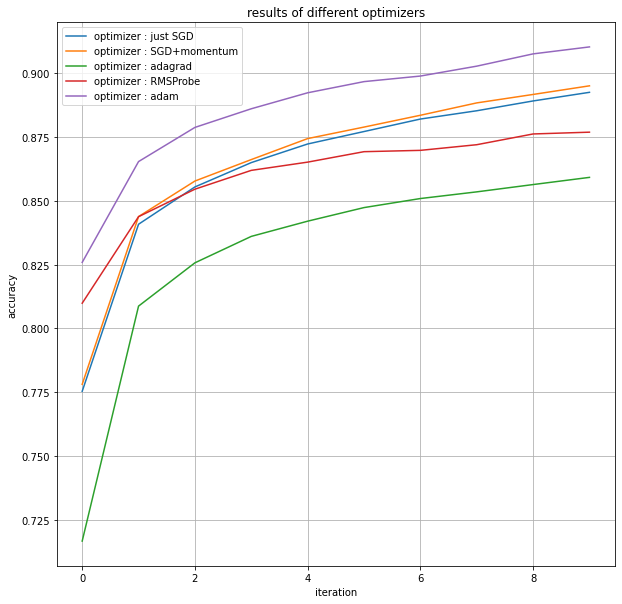

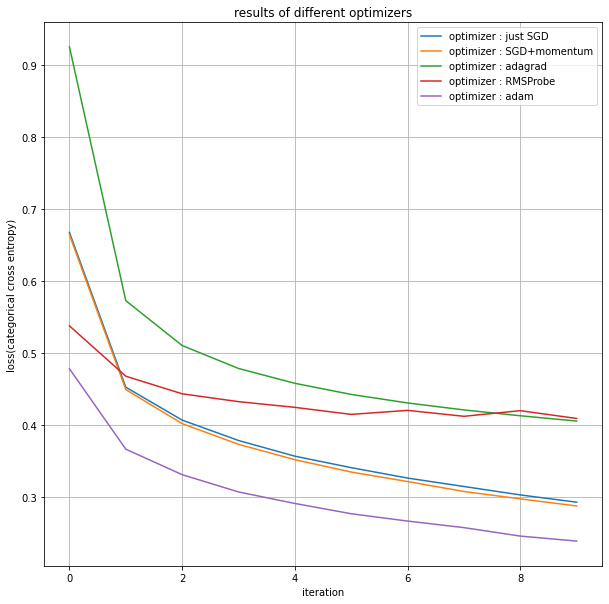

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(list(i for i in range(10)),model_JustSGD.history['accuracy'],label='optimizer : just SGD')
plt.plot(list(i for i in range(10)),model_SGD.history['accuracy'] , label='optimizer : SGD+momentum')
plt.plot(list(i for i in range(10)),model_adagrad.history['accuracy'] , label='optimizer : adagrad')
plt.plot(list(i for i in range(10)),model_RMSProbe.history['accuracy'] , label='optimizer : RMSProbe')
plt.plot(list(i for i in range(10)),model_adam.history['accuracy'] , label='optimizer : adam')
plt.legend()
plt.title('results of different optimizers')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.grid()
plt.show()
print('\n'*3)
plt.figure(figsize=(10,10))
plt.plot(list(i for i in range(10)),model_JustSGD.history['loss'],label='optimizer : just SGD')
plt.plot(list(i for i in range(10)),model_SGD.history['loss'] , label='optimizer : SGD+momentum')
plt.plot(list(i for i in range(10)),model_adagrad.history['loss'] , label='optimizer : adagrad')
plt.plot(list(i for i in range(10)),model_RMSProbe.history['loss'] , label='optimizer : RMSProbe')
plt.plot(list(i for i in range(10)),model_adam.history['loss'] , label='optimizer : adam')
plt.legend()
plt.title('results of different optimizers')
plt.ylabel('loss(categorical cross entropy)')
plt.xlabel('iteration')
plt.grid()
plt.show()

## evaluation on test

In [ ]:
print('our evaluation on model with adam result is:')
print(model_IIa.evaluate(testx,testy))
print('\n')
print('our evaluation on model with RMSProbe result is:')
print(model_II_RMS.evaluate(testx,testy))
print('\n')
print('our evaluation on model with adagrad result is:')
print(model_ada.evaluate(testx,testy))
print('\n')
print('our evaluation on model with SGD+Momentom result is:')
print(model_II_SGDmom.evaluate(testx,testy))
print('\n')
print('our evaluation on model with SGD result is:')
print(model_II_SGD.evaluate(testx,testy))

our evaluation on model with adam result is:
313/313 [==============================] - 1s 3ms/step - loss: 0.3451 - accuracy: 0.8865
[0.3451087176799774, 0.8865000009536743]


our evaluation on model with RMSProbe result is:
313/313 [==============================] - 1s 3ms/step - loss: 0.5718 - accuracy: 0.8626
[0.571810245513916, 0.8626000285148621]


our evaluation on model with adagrad result is:
313/313 [==============================] - 1s 3ms/step - loss: 0.4401 - accuracy: 0.8428
[0.44012144207954407, 0.8428000211715698]


our evaluation on model with SGD+Momentom result is:
313/313 [==============================] - 1s 3ms/step - loss: 0.3569 - accuracy: 0.8713
[0.35693177580833435, 0.8712999820709229]


our evaluation on model with SGD result is:
313/313 [==============================] - 1s 3ms/step - loss: 0.3481 - accuracy: 0.8724
[0.34813353419303894, 0.8723999857902527]


## our test predictions and classification reports and confusion matrix

test predictions

In [ ]:
y_hat_II=[]
test_labels_II=[]
for i in range(5):
  if i==0:
    y_hat_II.append(np.argmax(model_IIa.predict(testx), axis=1))
  if i==1:
    y_hat_II.append(np.argmax(model_II_RMS.predict(testx), axis=1))
  if i==2:
    y_hat_II.append(np.argmax(model_ada.predict(testx), axis=1))
  if i==3:
    y_hat_II.append(np.argmax(model_II_SGDmom.predict(testx), axis=1))
  if i==4:
    y_hat_II.append(np.argmax(model_II_SGD.predict(testx), axis=1))
test_labels_II.append(np.argmax(testy,axis=1))

classifiction report

In [ ]:
from sklearn.metrics import classification_report
print(f'classification reports for adam optimizer')
print(classification_report(np.array(test_labels_II).flatten(),np.array(y_hat_II[0]).flatten()))
print('\n'*3+'-'*100)
print(f'classification reports for RMSProbe optimizer')
print(classification_report(np.array(test_labels_II).flatten(),np.array(y_hat_II[1]).flatten()))
print('\n'*3+'-'*100)
print(f'classification reports for adagrad optimizer')
print(classification_report(np.array(test_labels_II).flatten(),np.array(y_hat_II[2]).flatten()))
print('\n'*3+'-'*100)
print(f'classification reports for SGD+Momentum optimizer')
print(classification_report(np.array(test_labels_II).flatten(),np.array(y_hat_II[3]).flatten()))
print('\n'*3+'-'*100)
print(f'classification reports for SGD optimizer')
print(classification_report(np.array(test_labels_II).flatten(),np.array(y_hat_II[4]).flatten()))

classification reports for adam optimizer
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.84      0.81      1000
           3       0.83      0.95      0.88      1000
           4       0.87      0.71      0.78      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.69      0.71      1000
           7       0.94      0.95      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000




----------------------------------------------------------------------------------------------------
classification reports for RMSProbe optimizer
              precision    recall  f1-score   sup

confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(f'classification reports for adam optimizer')
print(confusion_matrix(np.array(test_labels_II).flatten(),np.array(y_hat_II[0]).flatten()))
print('\n'*3+'-'*100)
print(f'classification reports for RMSProbe optimizer')
print(confusion_matrix(np.array(test_labels_II).flatten(),np.array(y_hat_II[1]).flatten()))
print('\n'*3+'-'*100)
print(f'classification reports for adagrad optimizer')
print(confusion_matrix(np.array(test_labels_II).flatten(),np.array(y_hat_II[2]).flatten()))
print('\n'*3+'-'*100)
print(f'classification reports for SGD+Momentum optimizer')
print(confusion_matrix(np.array(test_labels_II).flatten(),np.array(y_hat_II[3]).flatten()))
print('\n'*3+'-'*100)
print(f'classification reports for SGD optimizer')
print(confusion_matrix(np.array(test_labels_II).flatten(),np.array(y_hat_II[4]).flatten()))

classification reports for adam optimizer
[[853   1  13  35   0   0  88   0  10   0]
 [  6 971   1  19   0   0   2   0   1   0]
 [ 17   1 842  22  60   0  58   0   0   0]
 [ 16   5   5 946   4   1  18   0   5   0]
 [  0   1 127  75 711   0  83   0   3   0]
 [  0   0   0   0   0 956   0  26   1  17]
 [130   0  90  38  42   0 687   0  13   0]
 [  0   0   0   0   0  16   0 955   0  29]
 [  4   0   1   5   1   1   3   4 981   0]
 [  0   0   0   0   0   5   1  31   0 963]]



----------------------------------------------------------------------------------------------------
classification reports for RMSProbe optimizer
[[687   0  10  40   5   1 251   0   6   0]
 [  1 951   4  31   9   0   3   0   1   0]
 [  6   0 688  11 120   0 174   0   1   0]
 [  8   5   7 872  70   0  37   0   1   0]
 [  0   0  71  14 823   0  92   0   0   0]
 [  0   0   0   1   0 961   0  24   1  13]
 [ 60   0  47  32  59   0 796   0   6   0]
 [  0   0   0   0   0  13   0 942   0  45]
 [  0   0   1   5  11   5  31   7

#expriment III

The goal of this experiment is to see the effect of different activation functions. Choose the best architecture and the best optimizers from the previous experiments and train the model with the following activation functions:
tanh, sigmoid, ReLU, Leaky ReLU, PReLU

from privious sections we recognize that the best architecture is a mlp with 3*ni or 360 nerouns and 3  layer and the best optimizer is adam that we result from our test evaluation

##tanh

In [ ]:
hidden_matrix=[]
input_layer2=Input(shape=(28*28,))
ni=120
for i in range(3):
  if i==0:
    hidden_matrix.append(Dense(units=3*ni,activation='tanh')(input_layer2))
  else:
    hidden_matrix.append(Dense(units=3*ni,activation='tanh')(hidden_matrix[i-1]))
out_III=Dense(units=10,activation='softmax')(hidden_matrix[i])

model_III_tanh=Model(inputs=input_layer2,outputs=out_III)
model_III_tanh.summary()

model_III_tanh.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model_tanh=model_III_tanh.fit(trainx,trainy,batch_size=25,epochs=10)

Model: "model_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_174 (Dense)           (None, 360)               282600    
                                                                 
 dense_175 (Dense)           (None, 360)               129960    
                                                                 
 dense_176 (Dense)           (None, 360)               129960    
                                                                 
 dense_177 (Dense)           (None, 10)                3610      
                                                                 
Total params: 546,130
Trainable params: 546,130
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2400/2400 [==============================

## sigmoid

In [ ]:
hidden_matrix=[]
input_layer2=Input(shape=(28*28,))
ni=120
for i in range(3):
  if i==0:
    hidden_matrix.append(Dense(units=3*ni,activation='sigmoid')(input_layer2))
  else:
    hidden_matrix.append(Dense(units=3*ni,activation='sigmoid')(hidden_matrix[i-1]))
out_III=Dense(units=10,activation='softmax')(hidden_matrix[i])

model_III_sigmoid=Model(inputs=input_layer2,outputs=out_III)
model_III_sigmoid.summary()

model_III_sigmoid.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model_sigmoid=model_III_sigmoid.fit(trainx,trainy,batch_size=25,epochs=10)

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_178 (Dense)           (None, 360)               282600    
                                                                 
 dense_179 (Dense)           (None, 360)               129960    
                                                                 
 dense_180 (Dense)           (None, 360)               129960    
                                                                 
 dense_181 (Dense)           (None, 10)                3610      
                                                                 
Total params: 546,130
Trainable params: 546,130
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2400/2400 [==============================

## relu

In [ ]:
hidden_matrix=[]
input_layer2=Input(shape=(28*28,))
ni=120
for i in range(3):
  if i==0:
    hidden_matrix.append(Dense(units=3*ni,activation='relu')(input_layer2))
  else:
    hidden_matrix.append(Dense(units=3*ni,activation='relu')(hidden_matrix[i-1]))
out_III=Dense(units=10,activation='softmax')(hidden_matrix[i])

model_III_relu=Model(inputs=input_layer2,outputs=out_III)
model_III_relu.summary()

model_III_relu.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model_relu=model_III_relu.fit(trainx,trainy,batch_size=25,epochs=10)

Model: "model_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_182 (Dense)           (None, 360)               282600    
                                                                 
 dense_183 (Dense)           (None, 360)               129960    
                                                                 
 dense_184 (Dense)           (None, 360)               129960    
                                                                 
 dense_185 (Dense)           (None, 10)                3610      
                                                                 
Total params: 546,130
Trainable params: 546,130
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2400/2400 [==============================

## leaky relu

In [ ]:
from tensorflow.keras.layers import LeakyReLU,PReLU
input_layer=Input(shape=(28*28,))
ni=120

hidden_layer1=Dense(units=3*ni)(input_layer)
hidden_layer1=LeakyReLU()(hidden_layer1)

hidden_layer2=Dense(units=3*ni)(hidden_layer1)
hidden_layer2=LeakyReLU()(hidden_layer2)

hidden_layer3=Dense(units=3*ni)(hidden_layer2)
hidden_layer3=LeakyReLU()(hidden_layer3)



out_Leaky=Dense(units=10,activation='softmax')(hidden_layer3)

model_III_Leaky=Model(inputs=input_layer,outputs=out_Leaky)
model_III_Leaky.summary()

model_III_Leaky.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model_leaky=model_III_Leaky.fit(trainx,trainy,batch_size=25,epochs=10)

Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_189 (Dense)           (None, 360)               282600    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 360)               0         
                                                                 
 dense_190 (Dense)           (None, 360)               129960    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 360)               0         
                                                                 
 dense_191 (Dense)           (None, 360)               129960    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 360)               0  

## PReLU

In [ ]:
from tensorflow.keras.layers import LeakyReLU,PReLU
input_layer=Input(shape=(28*28,))
ni=120

hidden_layer1=Dense(units=3*ni)(input_layer)
hidden_layer1=PReLU()(hidden_layer1)

hidden_layer2=Dense(units=3*ni)(hidden_layer1)
hidden_layer2=PReLU()(hidden_layer2)

hidden_layer3=Dense(units=3*ni)(hidden_layer2)
hidden_layer3=PReLU()(hidden_layer3)

out_P=Dense(units=10,activation='softmax')(hidden_layer3)

model_III_Prelu=Model(inputs=input_layer,outputs=out_P)
model_III_Prelu.summary()

model_III_Prelu.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model_prelu=model_III_Prelu.fit(trainx,trainy,batch_size=25,epochs=10)

Model: "model_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_193 (Dense)           (None, 360)               282600    
                                                                 
 p_re_lu (PReLU)             (None, 360)               360       
                                                                 
 dense_194 (Dense)           (None, 360)               129960    
                                                                 
 p_re_lu_1 (PReLU)           (None, 360)               360       
                                                                 
 dense_195 (Dense)           (None, 360)               129960    
                                                                 
 p_re_lu_2 (PReLU)           (None, 360)               360

ploting train data model

[]

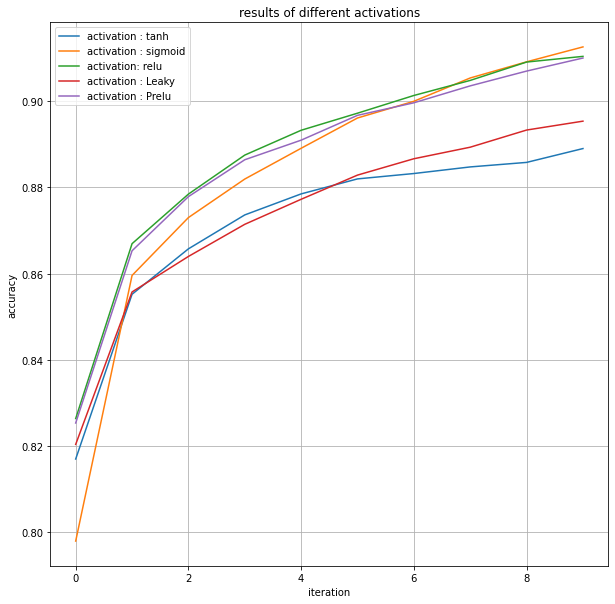

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(list(i for i in range(10)),model_tanh.history['accuracy'],label='activation : tanh')
plt.plot(list(i for i in range(10)),model_sigmoid.history['accuracy'] , label='activation : sigmoid')
plt.plot(list(i for i in range(10)),model_relu.history['accuracy'] , label='activation: relu')
plt.plot(list(i for i in range(10)),model_leaky.history['accuracy'] , label='activation : Leaky')
plt.plot(list(i for i in range(10)),model_prelu.history['accuracy'] , label='activation : Prelu')
plt.legend()
plt.title('results of different activations')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.grid()
plt.plot()

**evaluation on test**

In [ ]:
print('our evaluation on model with tanh result is:')
print(model_III_tanh.evaluate(testx,testy))
print('\n')
print('our evaluation on model with sigmoid result is:')
print(model_III_sigmoid.evaluate(testx,testy))
print('\n')
print('our evaluation on model with relu result is:')
print(model_III_relu.evaluate(testx,testy))
print('\n')
print('our evaluation on model with leaky relu result is:')
print(model_III_Leaky.evaluate(testx,testy))
print('\n')
print('our evaluation on model with Prelu result is:')
print(model_III_Prelu.evaluate(testx,testy))

our evaluation on model with tanh result is:
313/313 [==============================] - 1s 3ms/step - loss: 0.3561 - accuracy: 0.8723
[0.3560906946659088, 0.8723000288009644]


our evaluation on model with sigmoid result is:
313/313 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8819
[0.3354083299636841, 0.8819000124931335]


our evaluation on model with relu result is:
313/313 [==============================] - 1s 3ms/step - loss: 0.3755 - accuracy: 0.8810
[0.37550851702690125, 0.8809999823570251]


our evaluation on model with leaky relu result is:
313/313 [==============================] - 1s 3ms/step - loss: 0.3751 - accuracy: 0.8729
[0.37513041496276855, 0.8729000091552734]


our evaluation on model with Prelu result is:
313/313 [==============================] - 1s 4ms/step - loss: 0.3648 - accuracy: 0.8804
[0.36476579308509827, 0.8804000020027161]


In [ ]:
y_hat_III=[]
test_labels_III=[]
for i in range(5):
  if i==0:
    y_hat_III.append(np.argmax(model_III_tanh.predict(testx), axis=1))
  if i==1:
    y_hat_III.append(np.argmax(model_III_sigmoid.predict(testx), axis=1))
  if i==2:
    y_hat_III.append(np.argmax(model_III_relu.predict(testx), axis=1))
  if i==3:
    y_hat_III.append(np.argmax(model_III_Leaky.predict(testx), axis=1))
  if i==4:
    y_hat_III.append(np.argmax(model_III_Prelu.predict(testx), axis=1))
test_labels_III.append(np.argmax(testy,axis=1))

classification reports

In [ ]:
from sklearn.metrics import classification_report
print(f'classification reports for tanh activation')
print(classification_report(np.array(test_labels_III).flatten(),np.array(y_hat_III[0]).flatten()))
print('\n'*3+'-'*100)
print(f'classification reports for sigmoid activation')
print(classification_report(np.array(test_labels_III).flatten(),np.array(y_hat_III[1]).flatten()))
print('\n'*3+'-'*100)
print(f'classification reports for relu activation')
print(classification_report(np.array(test_labels_III).flatten(),np.array(y_hat_III[2]).flatten()))
print('\n'*3+'-'*100)
print(f'classification reports for Leaky relu activation')
print(classification_report(np.array(test_labels_III).flatten(),np.array(y_hat_III[3]).flatten()))
print('\n'*3+'-'*100)
print(f'classification reports for Prelu ativation')
print(classification_report(np.array(test_labels_III).flatten(),np.array(y_hat_III[4]).flatten()))

classification reports for tanh activation
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.76      0.81      0.78      1000
           3       0.84      0.92      0.88      1000
           4       0.79      0.73      0.76      1000
           5       0.97      0.94      0.95      1000
           6       0.69      0.68      0.68      1000
           7       0.94      0.95      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000




----------------------------------------------------------------------------------------------------
classification reports for sigmoid activation
              precision    recall  f1-score   su

confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print('classification reports for tanh activation')
print(confusion_matrix(np.array(test_labels_III).flatten(),np.array(y_hat_III[0]).flatten()))
print('\n'*3+'-'*100)
print('classification reports for sigmoid activation')
print(confusion_matrix(np.array(test_labels_III).flatten(),np.array(y_hat_III[1]).flatten()))
print('\n'*3+'-'*100)
print('classification reports for relu activation')
print(confusion_matrix(np.array(test_labels_III).flatten(),np.array(y_hat_III[2]).flatten()))
print('\n'*3+'-'*100)
print('classification reports for Leaky relu activation')
print(confusion_matrix(np.array(test_labels_III).flatten(),np.array(y_hat_III[3]).flatten()))
print('\n'*3+'-'*100)
print('classification reports for Prelu ativation')
print(confusion_matrix(np.array(test_labels_III).flatten(),np.array(y_hat_III[4]).flatten()))

classification reports for tanh activation
[[793   6  22  41   4   1 124   0   9   0]
 [  0 969   1  21   5   0   3   0   1   0]
 [  7   5 806  17  88   0  73   0   4   0]
 [ 15  11   9 923  19   0  21   0   2   0]
 [  0   1 129  55 734   0  81   0   0   0]
 [  0   0   0   1   0 940   0  27   0  32]
 [107   3  91  37  72   0 680   0  10   0]
 [  0   0   0   0   0  22   0 949   0  29]
 [  4   2   4   7   4   3   9   4 963   0]
 [  0   0   0   1   0   3   1  29   0 966]]



----------------------------------------------------------------------------------------------------
classification reports for sigmoid activation
[[805   1   4  16   3   1 165   0   5   0]
 [  2 969   0  22   3   1   2   0   1   0]
 [ 18   1 711   7 132   0 131   0   0   0]
 [ 20   3   8 876  42   0  48   0   3   0]
 [  1   1  48  16 860   0  74   0   0   0]
 [  0   0   0   1   0 966   0  24   1   8]
 [ 85   0  36  20  77   0 773   0   9   0]
 [  0   0   0   0   0  16   0 976   0   8]
 [  5   1   0   3   7   4   6   